<a href="https://colab.research.google.com/github/neocodered/EN3150_Pattern_Recognition/blob/main/EN3160_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1: Logistic Regression

## 1. Loading the data

In [2]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy() # Make a copy to avoid the warning
# Initialize the LabelEncoder
le = LabelEncoder()
# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded
# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])
# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop(['species', 'island', 'sex','class_encoded'], axis=1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


## 2. The line y_encoded = le.fit_transform(df_filtered['species']) is used to convert the categorical target variable 'species' into numerical values, such as assigning 0 to 'Adelie' and 1 to 'Chinstrap'. This encoding is necessary because logistic regression models require numerical input, so each species is represented by an integer.

##3. The 'species', 'island' and'sex' columns are eliminated from the dataset by this line since the logistic regression model cannot utilize them as features.

## species: The original labels for the species, which have already been swapped out for their numeric values that have been encoded.

## island and sex: These are unconverted categorical variables that do not have a number representation. These columns are eliminated unless correctly encoded since logistic regression needs numerical input.

## 4. The attributes 'island' and'sex' are categorical variables that lack a simple numerical representation. Given that logistic regression requires numerical inputs, including them without using the appropriate encoding, such one-hot encoding, may result in unreliable findings. Although these variables may be encoded, doing so may make the dataset more sparse and complicated. We can lessen the possibility of overfitting, streamline the model, and maybe enhance its accuracy and generalization by eliminating these variables.

## 5. Train a logistic regression model

In [3]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Train the logistic regression model. Here we are using saga solver to learn weights.
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)
# Predict on the testing data
y_pred = logreg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 0.5813953488372093
[[ 2.76262687e-03 -8.09960866e-05  4.80711561e-04 -2.87537554e-04]] [-8.44378721e-06]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## 6. By managing the random number generator during the split process, the random_state=42 setting guarantees the reproducibility of the train-test split. This ensures that each time the code is executed, the identical training and testing sets are generated.

## Randomization is used to divide the data into training and testing sets. We make sure the split is constant each time we execute the function by setting random_state=42.

## Inconsistent results would arise from splitting the data differently for every iteration if a random state wasn't specified.

## Since 42 is an arbitrary number, any value (such as 42, 0, 1) will suffice as long as it stays constant to guarantee that the split is the same between runs.


## 7.1 The two target classes—the Adelie and Chinstrap penguin species—are disproportionately large in number, with one class being far larger than the other. This imbalance may make it difficult for the model to anticipate the minority class, which would result in subpar performance. Furthermore, if there is insufficient training data, the model might not be able to identify important patterns, which might lead to underfitting—a situation in which the model performs badly on both training and testing data. Moreover, a linear relationship between the characteristics and the target variable's log chances is assumed by logistic regression. The model's performance can be negatively impacted if this connection is not linear.

## 7.2 The choice of the saga solver in logistic regression might also explain the model's poor performance in this scenario. The saga solver is specifically designed for handling large datasets and works efficiently with both L1 and L2 regularization. However, with a smaller dataset like the penguins dataset, the saga solver may not be the optimal choice. It could introduce unnecessary complexity, overcomplicating the learning process and potentially affecting convergence. The slower convergence and suboptimal weight learning associated with the saga solver in small datasets can negatively impact the model's predictive performance.

## 8. Changing the solver to "liblinear"

In [4]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Train the logistic regression model. Here we are using saga solver to learn weights.
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
# Predict on the testing data
y_pred = logreg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 1.0
[[ 1.45422752 -0.93943994 -0.16571368 -0.00398663]] [-0.04793176]


## The accuracy is 100%

## 9. Because the liblinear solver is optimized for short datasets and excels at binary classification tasks, using it increased accuracy. It makes use of a more straightforward optimization method that prevents overfitting and is effective with less data points. Due to the limited size of the penguin dataset, liblinear is able to train the model parameters more efficiently, resulting in nearly flawless accuracy.

## 10.Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standard Scaler to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate logistic regression using liblinear without scaling
logreg_liblinear = LogisticRegression(solver='liblinear')
logreg_liblinear.fit(X_train, y_train)
y_pred_liblinear = logreg_liblinear.predict(X_test)
accuracy_liblinear = accuracy_score(y_test, y_pred_liblinear)

# Train and evaluate logistic regression using saga without scaling
logreg_saga = LogisticRegression(solver='saga')
logreg_saga.fit(X_train, y_train)
y_pred_saga = logreg_saga.predict(X_test)
accuracy_saga = accuracy_score(y_test, y_pred_saga)

# Train and evaluate logistic regression using liblinear with scaling
logreg_liblinear_scaled = LogisticRegression(solver='liblinear')
logreg_liblinear_scaled.fit(X_train_scaled, y_train)
y_pred_liblinear_scaled = logreg_liblinear_scaled.predict(X_test_scaled)
accuracy_liblinear_scaled = accuracy_score(y_test, y_pred_liblinear_scaled)

# Train and evaluate logistic regression using saga with scaling
logreg_saga_scaled = LogisticRegression(solver='saga')
logreg_saga_scaled.fit(X_train_scaled, y_train)
y_pred_saga_scaled = logreg_saga_scaled.predict(X_test_scaled)
accuracy_saga_scaled = accuracy_score(y_test, y_pred_saga_scaled)

# Print out the accuracy values for comparison
print(f"Accuracy (liblinear without scaling): {accuracy_liblinear}")
print(f"Accuracy (saga without scaling): {accuracy_saga}")
print(f"Accuracy (liblinear with scaling): {accuracy_liblinear_scaled}")
print(f"Accuracy (saga with scaling): {accuracy_saga_scaled}")

Accuracy (liblinear without scaling): 1.0
Accuracy (saga without scaling): 0.5813953488372093
Accuracy (liblinear with scaling): 0.9767441860465116
Accuracy (saga with scaling): 0.9767441860465116


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## In the absence of feature scaling
 • On smaller datasets, liblinear works well, however variations in feature sizes have an impact on it.

 • Because it has trouble handling features on various sizes, Saga performs badly while scaling.

##  Using Feature Scaling
 • Scaling guarantees that all features have comparable ranges, which improves the performance of solvers like Saga with standard scaling, all features have means of 0 and standard deviation of 1.

 • Although there is less accuracy loss with scaling for liblinear, it might still be advantageous.

 ##  Why Scaling Matters
 • liblinear: Performs quite well in the absence of scaling but may somewhat degrade in its presence.

 • Saga: Uses gradient algorithms, thus scaling improves performance and allows for a faster convergence.

## 11. Running the code in Listing 3

In [6]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy() # Make a copy to avoid the warning
# Initialize the LabelEncoder
le = LabelEncoder()
# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded
df_filtered.head()
X = df_filtered.drop(['species', 'class_encoded'], axis=1)
y = df_filtered['class_encoded'] # Target variable
X.head()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)
# Predict on the testing data
y_pred = logreg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

ValueError: could not convert string to float: 'Dream'

In [7]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset and remove rows with missing values
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter for only 'Adelie' and 'Chinstrap' species
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()  # Copy to avoid potential SettingWithCopyWarning

# Initialize the LabelEncoder to convert categorical values to numerical
le = LabelEncoder()

# Encode the 'species' column (target variable)
df_filtered['class_encoded'] = le.fit_transform(df_filtered['species'])

# Encode other categorical columns ('island', 'sex') for feature use
df_filtered['island_encoded'] = le.fit_transform(df_filtered['island'])
df_filtered['sex_encoded'] = le.fit_transform(df_filtered['sex'])

# Remove the original categorical columns and any unnecessary ones
X = df_filtered.drop(['species', 'class_encoded', 'island', 'sex'], axis=1)  # Features
y = df_filtered['class_encoded']  # Target

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model using the saga solver
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model's performance by calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the model's coefficients and intercept
print(logreg.coef_, logreg.intercept_)


Accuracy: 0.9767441860465116
[[ 3.84529784 -0.50552461  0.41424709 -0.37909333 -0.24523281 -1.09448148]] [-2.13630939]


## A ValueError was encountered during the model fitting stage when running the code supplied in Listing 3. Categorical variables like island and sex were still in string format, according to the warning message "could not convert string to float," while the Logistic Regression model insklearn required numerical inputs. The island known as "Dream" specifically could not be made to float.

## We have to convert all category columns into numerical format in order to fix issue. The LabelEncoder from the sklearn.preprocessing module was used to do this.Additionally, feature scaling was applied to standardize the data using Standard Scaler to improve model performance,especially for solvers like saga.

## 12.  It is not suitable to use label encoding followed by feature scaling techniques like Standard Scaling or Min-Max Scaling when working with categorical features like "red," "blue," and "green." An arbitrary numerical value ('red' = 0, 'blue' = 1, 'green' = 2) is assigned via label encoding, but there is no clear ordinal link between these values. Scaling these figures might establish erroneous assumptions about their relationships.  One-hot encoding ensures that the model treats each color independently, without implying any order or relationship.

# 2. Logistic Regression on real world data

In [9]:
pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

## 2.Correlation matrix and Pair Plot

## Select the features 'alcohol', 'sulphates', 'fixed acidity', 'density', 'chlorides'.

                       alcohol  sulphates  fixed_acidity  \
alcohol               1.000000  -0.003029      -0.095452   
sulphates            -0.003029   1.000000       0.299568   
fixed_acidity        -0.095452   0.299568       1.000000   
total_sulfur_dioxide -0.265740  -0.275727      -0.329054   
chlorides            -0.256916   0.395593       0.298195   

                      total_sulfur_dioxide  chlorides  
alcohol                          -0.265740  -0.256916  
sulphates                        -0.275727   0.395593  
fixed_acidity                    -0.329054   0.298195  
total_sulfur_dioxide              1.000000  -0.279630  
chlorides                        -0.279630   1.000000  


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

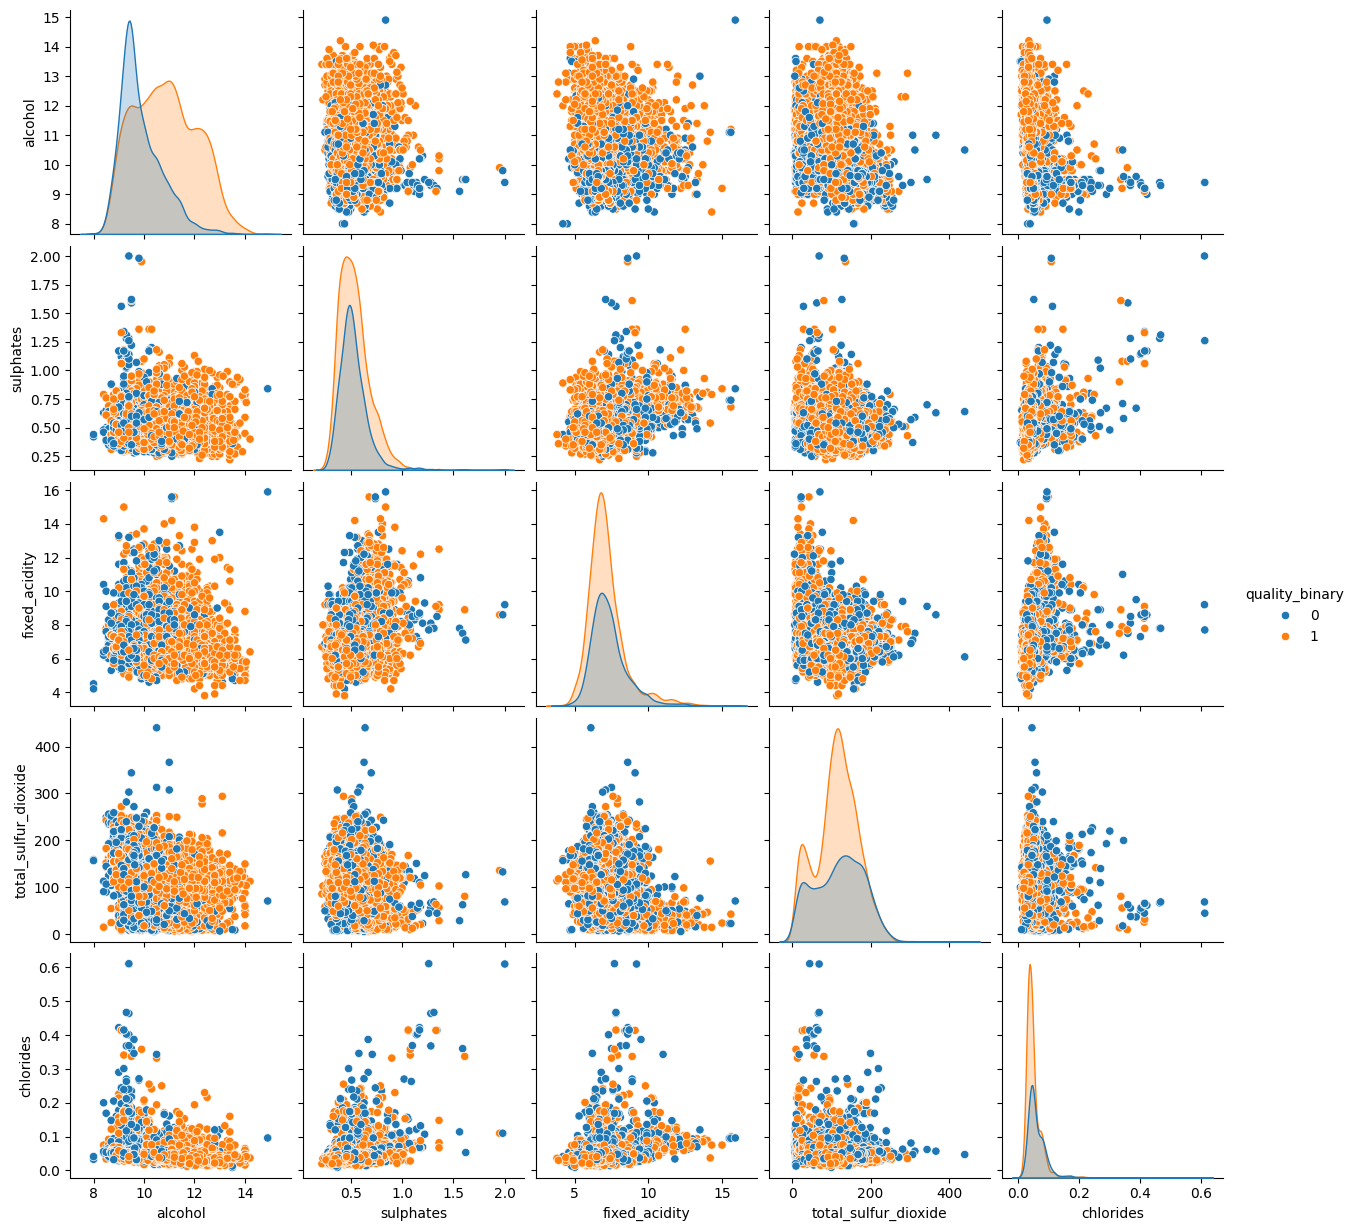

In [14]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert features and target to a single dataframe
data = pd.concat([X, y], axis=1)

# Create binary target variable (1 for quality >= 6, 0 for quality < 6)
data['quality_binary'] = (data['quality'] >= 6).astype(int)

# Select up to 5 features for the analysis
selected_features = ['alcohol', 'sulphates', 'fixed_acidity', 'total_sulfur_dioxide', 'chlorides']

# Correlation matrix
correlation_matrix = data[selected_features].corr()
print(correlation_matrix)

# Pairplot using seaborn
sns.pairplot(data[selected_features + ['quality_binary']], hue='quality_binary')
plt.show()


 ## All the correlation values are less than 0.5, indicating that all features are relatively independent. Therefore, we can conclude that our feature selection is effective.

## 3. Logistic Regression model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assign the selected features to X (input data) and the target variable (quality_binary) to y
X = data[selected_features]
y = data['quality_binary']

# Split the dataset into training and testing sets, reserving 30% for testing and using a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the training and testing feature sets to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

# Predict the target variable using the model on the scaled testing data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy and display it
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display the classification report, which includes precision, recall, and F1-score for the test predictions
print(classification_report(y_test, y_pred))

Accuracy: 0.6979487179487179
              precision    recall  f1-score   support

           0       0.58      0.52      0.55       691
           1       0.75      0.80      0.77      1259

    accuracy                           0.70      1950
   macro avg       0.67      0.66      0.66      1950
weighted avg       0.69      0.70      0.69      1950



### Accuracy: 69.8%
This means that the model correctly predicted the target variable (whether the wine quality is good or not) about 69.8% of the time across the entire dataset.

### Precision, Recall, and F1-Score:

#### Class 0 (Quality < 6):
- **Precision**: 0.58
  - Out of all the predictions where the model said the wine quality was low (class 0), it was correct 58% of the time.
- **Recall**: 0.52
  - Out of all the actual class 0 instances, the model was able to correctly identify 52% of them.
- **F1-Score**: 0.55
  - This is the harmonic mean of precision and recall. It gives a balance between precision and recall. A value of 0.55 means the model is moderately effective at distinguishing class 0 wines.

#### Class 1 (Quality ≥ 6):
- **Precision**: 0.75
  - Out of all the predictions where the model said the wine quality was high (class 1), it was correct 75% of the time.
- **Recall**: 0.80
  - Out of all the actual class 1 instances, the model was able to correctly identify 80% of them.
- **F1-Score**: 0.77
  - Again, a balanced score for class 1 wines, which shows that the model is relatively good at identifying wines with quality ≥ 6.

### Macro and Weighted Averages:
- **Macro Average**:
  - This treats both classes equally and gives an average score (precision, recall, and F1-score) for both classes. Here, the macro averages show a slight imbalance in performance between the two classes.
  
- **Weighted Average**:
  - This takes into account the imbalance in the dataset (more instances of class 1). The weighted average reflects the model's overall performance when accounting for the differing class sizes.

### Conclusion:
The model performs better at identifying wines with higher quality (class 1) with higher precision and recall compared to identifying lower-quality wines (class 0). However, the accuracy of 69.8% indicates there’s still room for improvement, possibly by tuning hyperparameters or exploring different algorithms to better handle the class imbalance.

## 4. P value analysis

In [16]:
import statsmodels.api as sm

# Add a constant to the features for the intercept term in the logistic regression model
X_train_const = sm.add_constant(X_train_scaled)

# Fit logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Print the summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.561190
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         quality_binary   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4541
Method:                           MLE   Df Model:                            5
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.1500
Time:                        16:06:10   Log-Likelihood:                -2551.7
converged:                       True   LL-Null:                       -3001.9
Covariance Type:            nonrobust   LLR p-value:                2.329e-192
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6887      0.036     19.021      0.000       0.618       0.760
x1             1.0504      0.

## Since the P value of the feature x3 is greater than 0.05 this variable (fixed_acidity) is less significant. So, it can be ignored.

# 3. Logistic regression First/Second-Order Methods

## 1. Generate Data

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

## 2. Implement Batch Gradient Descent

Iteration 0: Loss = 0.6931
Iteration 1: Loss = 0.6499
Iteration 2: Loss = 0.6109
Iteration 3: Loss = 0.5756
Iteration 4: Loss = 0.5437
Iteration 5: Loss = 0.5148
Iteration 6: Loss = 0.4885
Iteration 7: Loss = 0.4646
Iteration 8: Loss = 0.4428
Iteration 9: Loss = 0.4228
Iteration 10: Loss = 0.4044
Iteration 11: Loss = 0.3876
Iteration 12: Loss = 0.3720
Iteration 13: Loss = 0.3577
Iteration 14: Loss = 0.3444
Iteration 15: Loss = 0.3320
Iteration 16: Loss = 0.3205
Iteration 17: Loss = 0.3098
Iteration 18: Loss = 0.2998
Iteration 19: Loss = 0.2904


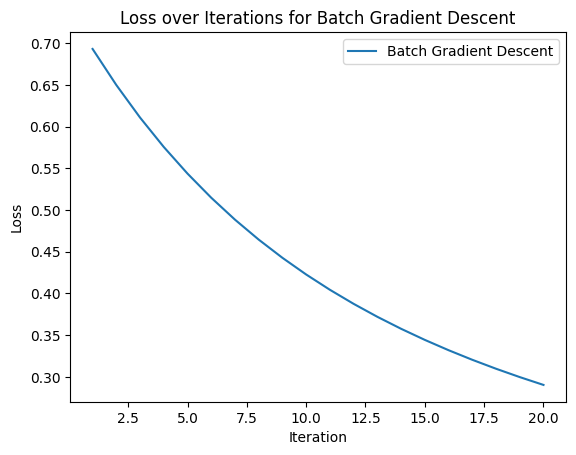

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    # Sigmoid function returns the probability prediction
    return 1 / (1 + np.exp(-z))

# Loss function (Logistic loss)
def compute_loss(y, y_pred):
    m = len(y)  # Number of samples
    # Logistic loss (binary cross-entropy) formula
    loss = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

# Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=0.01, iterations=20):
    # Initialize weights with zeros (X.shape[1] = number of features)
    weights = np.zeros(X.shape[1])
    bias = 0  # Initialize bias term
    m = len(y)  # Number of training examples

    # Store loss for each iteration to plot later
    loss_history = []

    for i in range(iterations):
        # Linear model
        linear_model = np.dot(X, weights) + bias

        # Apply sigmoid function to linear model to get predictions
        y_pred = sigmoid(linear_model)

        # Compute gradients for weights (dw) and bias (db)
        dw = (1 / m) * np.dot(X.T, (y_pred - y))  # Gradient of weights
        db = (1 / m) * np.sum(y_pred - y)         # Gradient of bias

        # Update weights and bias using the gradients and learning rate
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Compute the loss and store it for plotting
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

        # Print progress (optional)
        print(f"Iteration {i}: Loss = {loss:.4f}")

    return weights, bias, loss_history

# Adding bias term to X by inserting a column of ones for the intercept
X_bias = np.c_[np.ones(X.shape[0]), X]  # Adding bias term (X0 = 1)

# Run Batch Gradient Descent
weights, bias, loss_history = batch_gradient_descent(X_bias, y, learning_rate=0.01, iterations=20)

# Plot the loss over iterations
plt.plot(range(1, 21), loss_history, label='Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Batch Gradient Descent')
plt.legend()
plt.show()

## The weights has been initialized to zeros. This approach has several benefits:
 • Simplicity: Starting with zeros ensures that the initial predictions are not biased towards any
 particular class, especially in binary classification tasks.

 • Convergence: While other initialization methods (like random values) could also work, initializing
 to zeros helps ensure that the model converges without adding unnecessary randomness

 ## 5. SGD Implementation

Iteration 0: Loss = 0.0066
Iteration 1: Loss = 0.0036
Iteration 2: Loss = 0.0026
Iteration 3: Loss = 0.0020
Iteration 4: Loss = 0.0017
Iteration 5: Loss = 0.0014
Iteration 6: Loss = 0.0013
Iteration 7: Loss = 0.0011
Iteration 8: Loss = 0.0010
Iteration 9: Loss = 0.0009
Iteration 10: Loss = 0.0009
Iteration 11: Loss = 0.0008
Iteration 12: Loss = 0.0007
Iteration 13: Loss = 0.0007
Iteration 14: Loss = 0.0007
Iteration 15: Loss = 0.0006
Iteration 16: Loss = 0.0006
Iteration 17: Loss = 0.0006
Iteration 18: Loss = 0.0005
Iteration 19: Loss = 0.0005


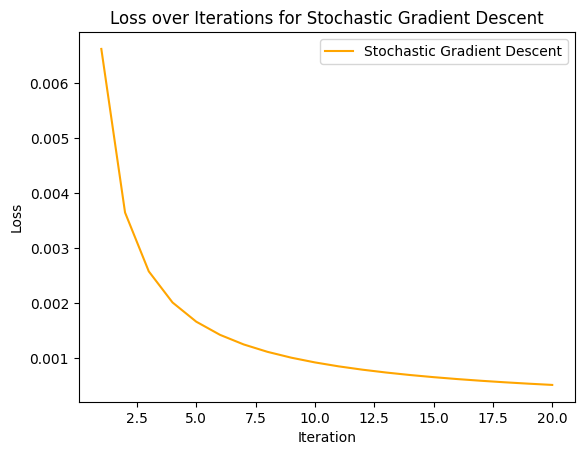

In [21]:
# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=20):
    # Initialize weights with zeros (X.shape[1] = number of features)
    weights = np.zeros(X.shape[1])
    bias = 0  # Initialize bias term
    m = len(y)  # Number of training examples

    # Store loss for each iteration to plot later
    loss_history = []

    for i in range(iterations):
        # Shuffle the data to ensure stochasticity in SGD
        indices = np.random.permutation(m)  # Generate shuffled indices
        X_shuffled = X[indices]  # Shuffle features
        y_shuffled = y[indices]  # Shuffle target values

        # Update weights using each training example one at a time
        for j in range(m):
            # Select a single training example
            X_i = X_shuffled[j, :].reshape(1, -1)  # Reshape to match dimensions
            y_i = y_shuffled[j]  # Target value for the selected example

            # Linear model (dot product of weights and input, plus bias)
            linear_model = np.dot(X_i, weights) + bias

            # Apply sigmoid function to get the predicted probability
            y_pred = sigmoid(linear_model)

            # Compute gradients for weights (dw) and bias (db) for the selected example
            dw = X_i.T * (y_pred - y_i)  # Gradient of weights
            db = (y_pred - y_i)          # Gradient of bias

            # Update weights and bias using the computed gradients and learning rate
            weights -= learning_rate * dw.flatten()  # Update weights
            bias -= learning_rate * db  # Update bias

        # After each full pass (iteration) over the dataset, compute the loss
        linear_model_full = np.dot(X, weights) + bias  # Linear combination for all data
        y_pred_full = sigmoid(linear_model_full)  # Predictions for all data
        loss = compute_loss(y, y_pred_full)  # Compute the loss (logistic loss)
        loss_history.append(loss)  # Store the loss for later plotting

        # Print progress (optional)
        print(f"Iteration {i}: Loss = {loss:.4f}")

    return weights, bias, loss_history

# Run Stochastic Gradient Descent
weights_sgd, bias_sgd, loss_history_sgd = stochastic_gradient_descent(X_bias, y, learning_rate=0.01, iterations=20)

# Plot the loss over iterations for Stochastic Gradient Descent
plt.plot(range(1, 21), loss_history_sgd, label='Stochastic Gradient Descent', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Stochastic Gradient Descent')
plt.legend()
plt.show()


## 6. Newton's Method

Iteration 0: Loss = 0.6931
Iteration 1: Loss = 0.1452
Iteration 2: Loss = 0.0528
Iteration 3: Loss = 0.0203
Iteration 4: Loss = 0.0080
Iteration 5: Loss = 0.0032
Iteration 6: Loss = 0.0013
Iteration 7: Loss = 0.0005
Iteration 8: Loss = 0.0002
Iteration 9: Loss = 0.0001
Iteration 10: Loss = 0.0000
Iteration 11: Loss = 0.0000
Iteration 12: Loss = 0.0000
Iteration 13: Loss = 0.0000
Iteration 14: Loss = 0.0000
Iteration 15: Loss = 0.0000
Iteration 16: Loss = 0.0000
Iteration 17: Loss = 0.0000
Iteration 18: Loss = 0.0000
Iteration 19: Loss = 0.0000


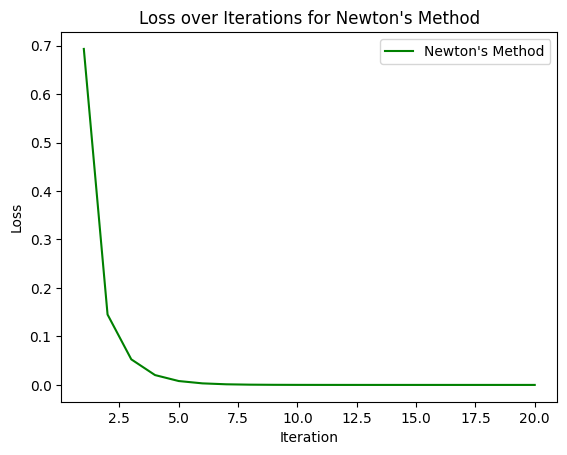

In [22]:
# Define the sigmoid function
def sigmoid(z):
    # Sigmoid activation function
    return 1 / (1 + np.exp(-z))

# Define the compute_loss function
def compute_loss(y, y_pred):
    # Calculate binary cross-entropy loss (logistic loss)
    # A small epsilon (1e-15) is added to avoid log(0)
    return -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))

# Implement Newton's Method
def newtons_method(X, y, iterations=20):
    # Initialize weights with zeros (X.shape[1] = number of features)
    weights = np.zeros(X.shape[1])
    bias = 0  # Initialize bias term
    m = len(y)  # Number of training examples

    # Store loss for each iteration to plot later
    loss_history = []

    for i in range(iterations):
        # Linear model: Z = X * weights + bias
        linear_model = np.dot(X, weights) + bias
        # Predictions using sigmoid function
        y_pred = sigmoid(linear_model)

        # Gradient (first derivative of the loss function with respect to weights)
        gradient = np.dot(X.T, (y_pred - y)) / m  # Mean of the gradients

        # Hessian matrix (second derivative of the loss function with respect to weights)
        S = np.diag(y_pred * (1 - y_pred))  # Diagonal matrix of the second derivatives (variance of predictions)
        hessian = np.dot(X.T, np.dot(S, X)) / m  # Hessian matrix (second derivative)

        # Update weights using Newton's method: weights = weights - (Hessian^-1 * Gradient)
        weights -= np.linalg.inv(hessian).dot(gradient)

        # Update bias term (bias update uses simple gradient descent)
        bias -= np.mean(y_pred - y)  # Mean of the errors

        # Calculate the loss (binary cross-entropy)
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

        # Print loss for each iteration
        print(f"Iteration {i}: Loss = {loss:.4f}")

    return weights, bias, loss_history

# Run Newton's Method
weights_newton, bias_newton, loss_history_newton = newtons_method(X_bias, y, iterations=20)

# Plot the loss over iterations
plt.plot(range(1, 21), loss_history_newton, label='Newton\'s Method', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Newton\'s Method')
plt.legend()
plt.show()


## 8. Gradient descent, Stochastic Gradient Descent and Newton method

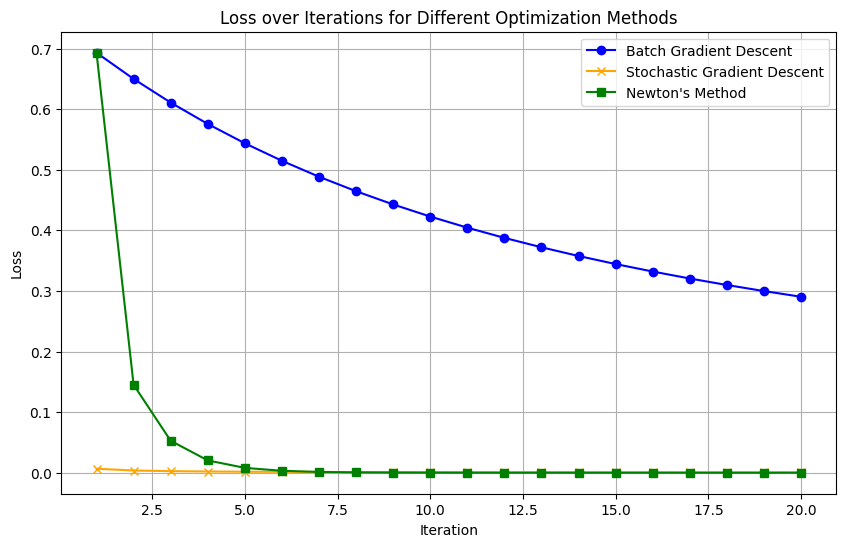

In [23]:
import matplotlib.pyplot as plt


# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), loss_history, label='Batch Gradient Descent', color='blue', marker='o')
plt.plot(range(1, 21), loss_history_sgd, label='Stochastic Gradient Descent', color='orange',  marker='x')
plt.plot(range(1, 21), loss_history_newton, label='Newton\'s Method', color='green', marker='s')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Different Optimization Methods')
plt.legend()
plt.grid()
plt.show()

## 10. Changing the data centeres

Iteration 0: Loss = 0.6931
Iteration 1: Loss = 0.6865
Iteration 2: Loss = 0.6804
Iteration 3: Loss = 0.6747
Iteration 4: Loss = 0.6695
Iteration 5: Loss = 0.6647
Iteration 6: Loss = 0.6602
Iteration 7: Loss = 0.6560
Iteration 8: Loss = 0.6521
Iteration 9: Loss = 0.6485
Iteration 10: Loss = 0.6451
Iteration 11: Loss = 0.6420
Iteration 12: Loss = 0.6390
Iteration 13: Loss = 0.6362
Iteration 14: Loss = 0.6336
Iteration 15: Loss = 0.6312
Iteration 16: Loss = 0.6288
Iteration 17: Loss = 0.6266
Iteration 18: Loss = 0.6245
Iteration 19: Loss = 0.6226


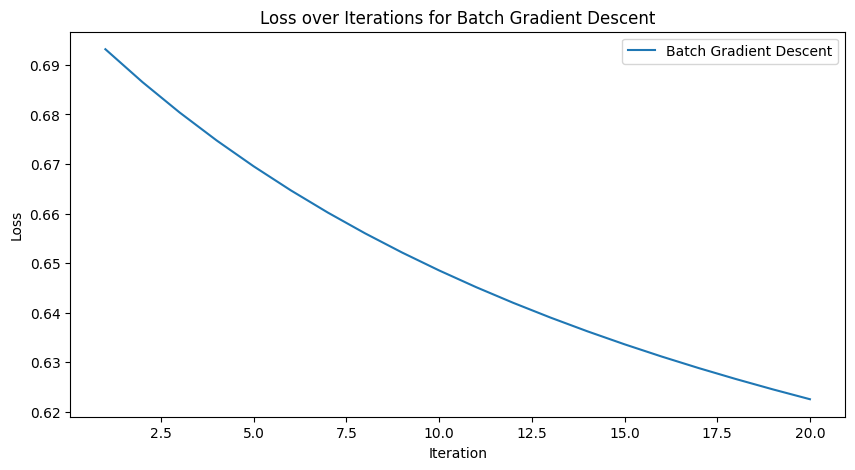

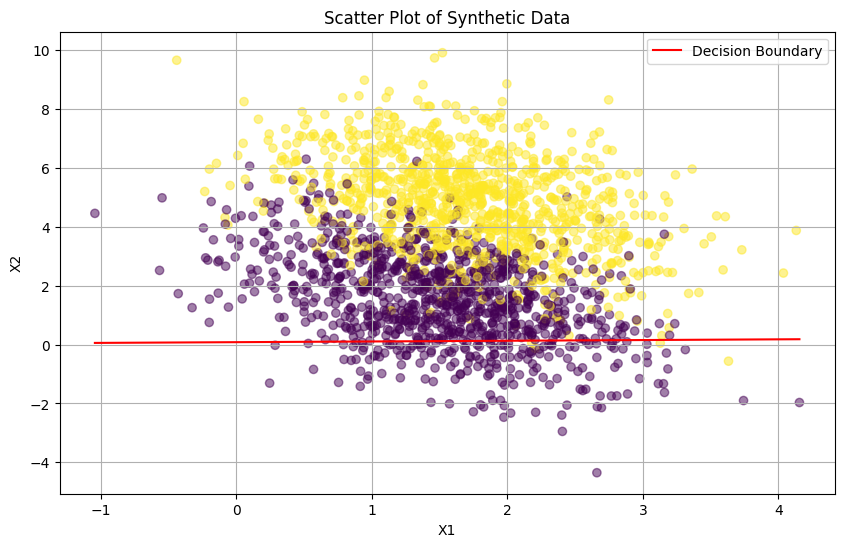

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[3, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Convert y to binary (0 and 1) for binary classification
y_binary = np.where(y == 0, 0, 1)  # Assuming two classes in the data

# Adding bias term to X
X_bias = np.c_[np.ones(X.shape[0]), X]  # Adding bias term (X0 = 1)

# Run Batch Gradient Descent
weights, bias, loss_history = batch_gradient_descent(X_bias, y_binary, learning_rate=0.01, iterations=20)

# Plot the loss over iterations
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), loss_history, label='Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Batch Gradient Descent')
plt.legend()
plt.show()

# Scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_binary, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot of Synthetic Data')

# Plot decision boundary
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = -(weights[1] * x_values + bias) / weights[2]
plt.plot(x_values, y_values, color='red', label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.legend()
plt.show()